## Esercizio 07.03.25

Start from Week7.2 - intro to ML (pre-lesson) notebook.

Assume house price depends not only on size, but also on number of windows.

n_windows = np.random.randint(3,8,100)

house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes*2 + np.random.normal(0, 50, n_samples) + 15n_windows

Try:

1. Change the initial data, but keep using only house_sizes as regressor. What has changed?

2. Adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?

3. Come up with a good way to visualize linear regression outputs with 2 regressors

## 1. Cambiare i dati usando solo house_sizes come regressore

Generiamo il nuovo dataset includendo n_windows ma usando solo house_sizes nel modello.

1.1 Generiamo n_windows casualmente;

1.2 Modifichiamo house_prices per includere l'effetto di n_windows;

1.3 Addestriamo il modello solo con house_sizes;

1.4 Confrontiamo i risultati con il modello originale.

In [3]:
!pip install scikit-learn

In [4]:
# Importiamo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

1.1

In [5]:
# Creiamo dataset cambiando random seed
np.random.seed(40)  # For reproducible results
n_samples = 200

# Generiamo le dimensioni delle case tra 1000 e 3000 piedi quadrati
house_sizes = np.random.randint(1000, 3000, n_samples)

# Generiamo il numero di finestre casualmente tra 3 e 8
np.random.seed(42)  # Per riproducibilità
n_samples = 200
n_windows = np.random.randint(3, 8, n_samples)

1.2

In [6]:
# Creiamo i nuovi prezzi delle case includendo il numero di finestre
house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15 * n_windows

# Creiamo il DataFrame
data = pd.DataFrame({
    'Size': house_sizes,
    'Price': house_prices
})

# Visualizzazione 5 prime righe del dataset
data.head()

,Size,Price
0,2350,492.054867
1,1219,415.068006
2,1007,371.599717
3,1165,424.457685
4,2016,487.677293


1.3

In [7]:
# Manteniamo solo house_sizes come regressore
X = data[['Size']]
y = data['Price']

# Ritrain/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creiamo e addestriamo il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Predizioni
y_pred = model.predict(X_test)

# Valutiamo il modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 3099.49
Root Mean Squared Error: 55.67
R-squared Score: 0.2305


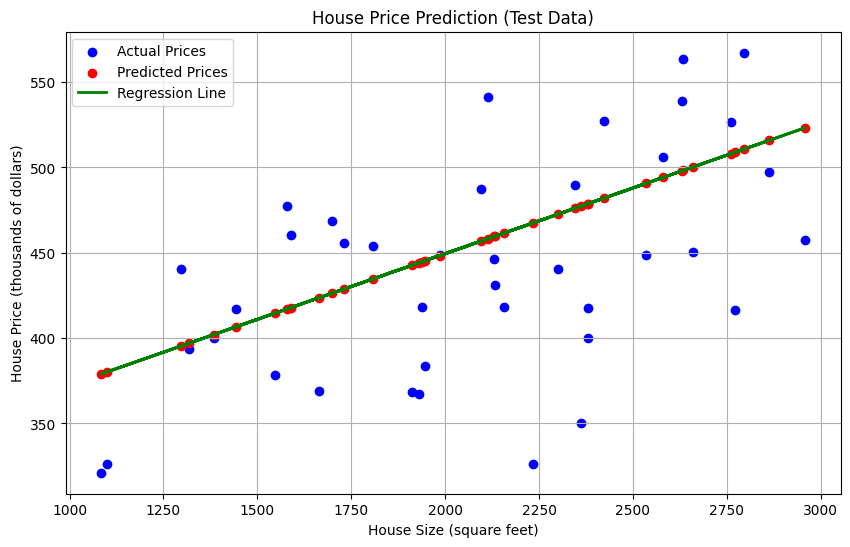

In [8]:
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

# Plot the predicted data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')

# Plot the regression line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.title('House Price Prediction (Test Data)')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.legend()
plt.grid(True)
plt.show()

1.4 

Risultati originali:

-Mean Squared Error: 2670.55

-Root Mean Squared Error: 51.68

-R-squared Score: 0.4141

Risultati ottenuti in questo primo modello:

-Mean Squared Error: 3099.49

-Root Mean Squared Error: 55.67

-R-squared Score: 0.2305

Cosa notiamo?

-Il Mean Squared Error (MSE) è più alto rispetto al modello originale.

-Il Root Mean Squared Error (RMSE) è passato da 51.68 a 55.67, quindi le previsioni sono più imprecise.

-Nel modello originale R² = 0.4141, quindi il modello spiegava circa il 41.41% della varianza nei prezzi delle case; ora R² = 0.2305.

*Abbiamo introdotto una nuova variabile (n_windows) che influisce sui prezzi ma il modello sta ancora usando solo house_sizes per fare le previsioni. Ciò significa che il modello ignora una variabile importante (n_windows) che influisce sui prezzi. Di conseguenza, le previsioni sono meno accurate perché una parte della variabilità non viene spiegata.*

## 2. Usare sia house_sizes che n_windows come regressori

2.1 Aggiungiamo n_windows come feature;

2.2 Ricreiamo il modello di regressione con entrambe le variabili;

2.3 Confrontiamo i risultati con i modelli precedenti.

2.1

In [9]:
# Aggiungiamo n_windows al dataset
data['Windows'] = n_windows

2.2

In [10]:
# Usiamo sia Size che Windows come regressori
X = data[['Size', 'Windows']]
y = data['Price']

# Ritrain/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creiamo e addestriamo il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Predizioni
y_pred = model.predict(X_test)

# Valutiamo il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 2936.50
Root Mean Squared Error: 55.67
R-squared Score: 0.2710


2.3 

Risultati originali:

-Mean Squared Error: 2670.55

-Root Mean Squared Error: 51.68

-R-squared Score: 0.4141

Risultati ottenuti in nel primo modello:

-Mean Squared Error: 3099.49

-Root Mean Squared Error: 55.67

-R-squared Score: 0.2305

Risultati ottenuti in questo secondo modello:

-Mean Squared Error: 2936.50

-Root Mean Squared Error: 55.67

-R-squared Score: 0.2710

Cosa notiamo?

-Il MSE è passato da 3099.49 a 2936.50, quindi c'è un miglioramento.

-Il RMSE è risultato 55.67 sia nel primo che nel secondo modello, rispetto a 51.68 del modello originale.

-Nel primo modello, R² era 0.0.2305, ora R² è 0.2710.

*Il secondo modello è migliore del primo ma non è ancora efficace come il modello originale.*

💡 Come migliorare questo secondo modello?

-Controllare la correlazione tra le variabili per capire il loro impatto.
    
-Aggiungere termini non lineari o interazioni per catturare meglio la relazione tra le variabili.
    
-Standardizzare le variabili per evitare problemi di scala.
    
-Provare modelli più avanzati (es. Ridge, Random Forest) se la regressione lineare non è sufficiente.

## 3. Visualizzare una regressione con 2 regressori

Avendo due 2 variabili indipendenti (house_sizes e n_windows) non possiamo rappresentare tutto in un semplice grafico 2D.
Proponiamo un grafico 3D.

Usiamo Matplotlib per un plot 3D con house_sizes e n_windows sugli assi X e Y, e il prezzo (vero e predetto) sull'asse Z.

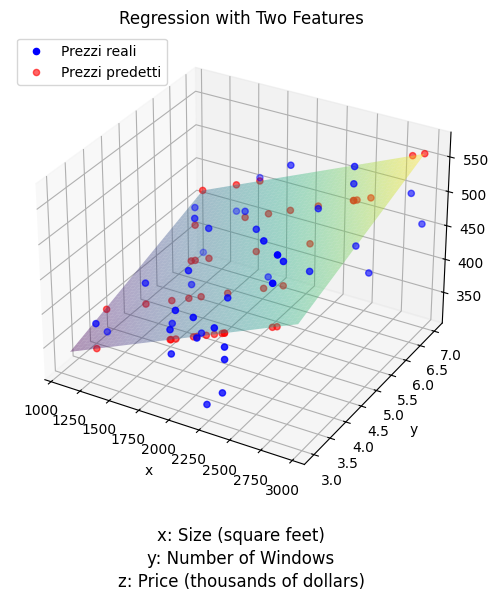

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creiamo il grafico 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dei dati reali
ax.scatter(X_test['Size'], X_test['Windows'], y_test, color='blue', label="Prezzi reali")

# Scatter plot dei dati predetti
ax.scatter(X_test['Size'], X_test['Windows'], y_pred, color='red', label="Prezzi predetti", alpha=0.6)

# Creiamo la superficie di regressione
size_range = np.linspace(X_test['Size'].min(), X_test['Size'].max(), 50)
windows_range = np.linspace(X_test['Windows'].min(), X_test['Windows'].max(), 50)
size_grid, windows_grid = np.meshgrid(size_range, windows_range)

# Creiamo un DataFrame con i nomi delle colonne corretti
grid_df = pd.DataFrame({
    'Size': size_grid.ravel(),
    'Windows': windows_grid.ravel()
})

# Calcoliamo i valori predetti sulla griglia
Z_pred = model.predict(grid_df)
Z_pred = Z_pred.reshape(size_grid.shape)

# Aggiungiamo la superficie di regressione
ax.plot_surface(size_grid, windows_grid, Z_pred, alpha=0.4, cmap='viridis')

# Etichette degli assi
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Regression with Two Features')

# Prima legenda (dati reali e predetti)
ax.legend(loc='upper left')

# Aggiungiamo una seconda legenda sotto il grafico
ax.text2D(0.5, -0.1, 'x: Size (square feet)', transform=ax.transAxes, fontsize=12, horizontalalignment='center')
ax.text2D(0.5, -0.15, 'y: Number of Windows', transform=ax.transAxes, fontsize=12, horizontalalignment='center')
ax.text2D(0.5, -0.2, 'z: Price (thousands of dollars)', transform=ax.transAxes, fontsize=12, horizontalalignment='center')

# Mostra il grafico
plt.show()


I punti blu rappresentano i prezzi reali; ipunti rossi rappresentano le previsioni del modello.

Se il modello è buono, i punti rossi e blu si trovano in vicinanza.